In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [9]:
import sys
sys.maxsize

9223372036854775807

In [10]:
data = load_diabetes()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y[0]

151.0

In [11]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

In [12]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [13]:
X_train_num = np.dot(X_train,1000).astype(int)
X_test_num = np.dot(X_test,1000).astype(int)
y_train_num = y_train
y_test_num = y_test

In [14]:
print(X_train_num)

[[ 70  50  12 ...  34  27  -1]
 [ -9  50 -18 ...  71   0  19]
 [  5 -44  49 ...  -2  17 -13]
 ...
 [ 30 -44 -20 ... -39 -10  -1]
 [-12 -44 -23 ...  -2 -38 -38]
 [-92 -44  28 ... -39  -5  -1]]


In [15]:
X_train_den = np.full(X_train.shape, 1000) 
X_test_den = np.full(X_test.shape, 1000) 
y_train_den = np.ones(len(y_train))
y_test_den = np.ones(len(y_test))

In [16]:
print(X_train_den)

[[1000 1000 1000 ... 1000 1000 1000]
 [1000 1000 1000 ... 1000 1000 1000]
 [1000 1000 1000 ... 1000 1000 1000]
 ...
 [1000 1000 1000 ... 1000 1000 1000]
 [1000 1000 1000 ... 1000 1000 1000]
 [1000 1000 1000 ... 1000 1000 1000]]


In [17]:
#shortening numners 
def shorter(c,d):
    c = int(c)
    d = int(d)
    if(c<0):
        n = c*(-1)
        if(len(str(n))==len(str(d)) and len(str(n))>3):      
            a = f"{n:.0f}"
            a = str(a[:-3])
            a = int(a)*(-1)
            b = f"{d:.0f}"
            b = str(b[:-3])
            b = int(b)
        elif(len(str(n))>=3 and len(str(d))>=3):
            a = f"{n:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-2
            else:
                s = len(str(b))-2
            a = int(a[:-s])
            b = int(b[:-s])
            a = a*-1 
        else:
            a = int(n*-1)
            b = d
    elif(len(str(c))==len(str(d)) and len(str(c))>3):      
            a = f"{c:.0f}"
            a = str(a[:-2])
            a = int(a)
            b = f"{d:.0f}"
            b = str(b[:-2])
            b = int(b)
#     elif(len(str(c))==1 and len(str(d))>3):
#         a = int(0)
#         b = int(1)
    elif(len(str(c))>3 and len(str(d))>3):
            a = f"{c:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-3
            else:
                s = len(str(b))-3
            a = int(a[:-s])
            b = int(b[:-s])
    else:
        a = c
        b = d
    return a,b

In [44]:
#condensed function multiply and add matrix with numerator and denominator one row at a time
# Python Program to find the L.C.M. of two input number
from math import gcd
def compute_lcm(x, y):
   # choose the greater number 
    if (x > y):
        greater = x
    else:
        greater = y
    while(True):
        if(x==0):
            lcm = y
            break
        elif(y==0):
            lcm = x
            break
        elif((greater % x == 0) and (greater % y == 0)):
            lcm = greater
            break
        greater += 1
    return lcm
 
#Subtracting 2 numbers of the form a/b -c/d
def subtraction(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) - ((den/d)*c)
    return num,den

#adding array of elements of the form x/y
def add_array(a_num,a_den):
    #will work for an int array of any length
    lcm = np.amax(a_den);sum1 =0
#     for i in a_den:
#         lcm = int(lcm*i/gcd(lcm, i))
#     print("lcm is ",lcm)
    for i in range(len(a_num)):
        sum1 = sum1 + (a_num[i]*(a_den[i]/lcm))
#         print(a_num[i],a_den[i],lcm)      
#     print("sum is ", sum1)
    return sum1,lcm

#adding two numbers of the form a/b + c/d
def addition(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) + ((den/d)*c)
    return int(num),int(den)

#multiplying two arrays of fraction and adding them  for row by column multiplication
def multiply(a_num,a_den,b_num, b_den):
#     print(type(a_num))
    z_num = np.zeros(len(a_num)).astype(int)
    z_den = np.zeros(len(a_den)).astype(int)
#     print("printing anum,aden,bnum,bden",a_num,a_den,b_num,b_den)                                   
    for i in range(len(a_num)):
        z_num[i]=(a_num[i]*b_num[i])     
        z_den[i]=(a_den[i]*b_den[i])
    
    x = z_num.tolist()
    y = z_den.tolist()
#     print("Printing z_num and z_den", x , y )
    num,den = add_array(x,y)
#     print("multiplication results is",num,den) 
    return num,den
    

In [48]:
an,dn = multiply([-1, 19, -13, -129, -42, -129, 40, 73, 27, -92, -1, 7, -71, 36, -54, 3, -96, -50, 11, 48, -25, 32, 27, 40, 106, 40, -9, -17, 11, -34, -67, -13, -71, 15, -17, 15, 52, 3, -13, -21, -5, 3, 40, 40, 3, 85, 56, 23, 98, -88, -5, -42, 15, 127, -21, 131, 19, 11, 48, 19, 106, 23, -50, -59, 73, -34, -1, -42, -59, -13, 73, 19, -13, -67, 27, -59, -38, -9, -5, 3, 11, 69, -54, -5, -25, -5, 56, 36, 7, 36, 19, -46, 77, -42, -38, 23, -67, -50, -9, 32, 32, -34, 3, -30, -1, 23, 15, 106, 7, 15, -59, 15, 119, -1, 23, 19, 36, 61, -92, 40, -25, 11, 3, 19, -30, 73, -30, 32, -42, -59, 69, 40, 77, -92, 3, 135, -5, 7, 48, 69, -30, -9, 3, 56, 40, 3, 32, -38, 23, 40, 7, 7, -59, 3, -50, -50, -34, -17, -30, 119, 131, 81, -34, -54, 56, -30, -38, -1, 23, 3, -9, 7, -1, 44, -50, 32, -38, 15, -13, -21, 36, 56, 32, 3, -21, -9, -75, -54, -96, 98, -5, 65, -30, 81, -17, -137, 15, -30, -71, -71, -38, -17, -42, 19, -54, -17, -1, -38, 27, -38, -5, -21, 19, -17, 52, -30, -9, 61, 3, 27, 90, 23, -46, 11, -34, -1, -54, -63, 7, -46, -67, -38, 106, 19, -83, 27, 27, 44, 7, 40, 7, 69, -17, -17, -1, 19, 73, -25, 56, -71, 11, 27, 11, 44, -75, -34, 94, -30, -59, 48, -25, 36, 3, 11, 36, 19, 3, 40, 40, -1, -9, -21, 135, -38, 27, 85, 73, 44, -5, 81, 7, 19, 48, -92, 85, -13, -5, -25, -67, -17, 48, 19, 15, -13, -1, -21, 56, -13, -1, 69, -75, 36, -104, 19, 32, -46, -13, 23, 61, -42, 7, 11, 7, 7, -25, 44, -104, 19, -50, -21, -30, 48, -30, -17, -1, -46, -21, -9, -13, -1, 19, 7, -50, -79, -38, 73, -13, 61, -54, -21, -38, 15, -54, 11, 3, 15, -9, 61, -83, 15, -1, -38, -1] , [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000] , [-1428, -1490, -2790, -124436, -58400, -64444, -2800, -2757, -166089, -89265, -71167, -1769, -87388, -2688, -100355, -1959, -96514, -52012, -700, -2608, -51170, -1010, -1649, -1878, -1718, -2189, -205133, -96249, -59114, -60411, -241003, -120135, -127228, -103172, -2639, -131023, -2819, -1730, -128290, -2560, -136536, -617, -92221, -2310, -2069, -2597, -1779, -2568, -2609, -50185, -2358, -70402, -1376, -2666, -68343, -3158, -2477, -153006, -1908, -1148, -799, -1208, -258052, -1900, -2907, -54103, -1060, -209336, -900, -2518, -838, -251096, -58337, -77248, -199090, -770, -2440, -1740, -41401, -126153, -52028, -930, -103350, -198133, -2640, -2800, -2466, -2559, -2138, -3019, -1688, -58055, -2758, -2079, -137260, -197109, -123074, -95262, -287036, -2239, -264042, -100593, -54175, -1968, -500, -2505, -63282, -2187, -1296, -2107, -141341, -1019, -1538, -1197, -85262, -110149, -639, -1298, -50333, -1270, -1400, -470, -1080, -177299, -87064, -824, -215038, -1488, -59101, -95190, -1888, -730, -2779, -181391, -159059, -2436, -275162, -1728, -1786, -1487, -1946, -1367, -960, -2449, -3199, -3067, -1080, -678, -181145, -2566, -160012, -1769, -213255, -44134, -149443, -159228, -54372, -1958, -184393, -2669, -3085, -1218, -669, -71368, -1839, -143272, -146102, -167340, -1769, -245135, -150037, -1260, -82037, -3308, -151579, -1079, -89102, -65012, -2130, -84517, -1278, -879, -2578, -2278, -199212, -76422, -53069, -30330, -1080, -2050, -143048, -1170, -82382, -2406, -2579, -71537, -1619, -180343, -140073, -70456, -1359, -1939, -178145, -1009, -130263, -46104, -2338, -76219, -1969, -92239, -161374, -2240, -2738, -182113, -3047, -80044, -54546, -145003, -1949, -2288, -3086, -39362, -134107, -345001, -42354, -1269, -76275, -2339, -48165, -73495, -91098, -83298, -2618, -143065, -141574, -3398, -1139, -1569, -2719, -84136, -87083, -2185, -38113, -789, -171209, -2157, -3348, -51135, -271048, -114304, -1090, -1300, -70119, -2740, -117083, -24224, -987, -2800, -220018, -2466, -199048, -1310, -899, -658, -2009, -719, -84029, -2740, -2416, -650, -292063, -2347, -2417, -86027, -38097, -2154, -91036, -2947, -291037, -1407, -49084, -52057, -1030, -74274, -1187, -1410, -1418, -98041, -64410, -115349, -2317, -1628, -939, -58034, -1378, -144107, -1759, -1840, -96051, -41144, -200423, -2396, -69494, -77121, -48026, -102145, -43080, -1100, -1900, -46115, -181044, -57104, -154139, -150212, -78145, -1029, -142566, -1509, -169022, -740, -199091, -1230, -900, -48232, -1617, -52341, -2817, -177264, -218094, -199003, -112112, -1120, -62079, -113441, -125065, -2728, -87091, -3098, -82056, -700, -1329, -2429, -64262, -1719, -560, -67315, -1399, -2688, -133511, -2010, -147044, -63226, -301052] , [10, 10, 10, 1000, 1000, 1000, 10, 10, 1000, 1000, 1000, 10, 1000, 10, 1000, 10, 1000, 1000, 10, 10, 1000, 10, 10, 10, 10, 10, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 10, 1000, 10, 10, 1000, 10, 1000, 10, 1000, 10, 10, 10, 10, 10, 10, 1000, 10, 1000, 10, 10, 1000, 10, 10, 1000, 10, 10, 10, 10, 1000, 10, 10, 1000, 10, 1000, 10, 10, 10, 1000, 1000, 1000, 1000, 10, 10, 10, 1000, 1000, 1000, 10, 1000, 1000, 10, 10, 10, 10, 10, 10, 10, 1000, 10, 10, 1000, 1000, 1000, 1000, 1000, 10, 1000, 1000, 1000, 10, 10, 10, 1000, 10, 10, 10, 1000, 10, 10, 10, 1000, 1000, 10, 10, 1000, 10, 10, 10, 10, 1000, 1000, 10, 1000, 10, 1000, 1000, 10, 10, 10, 1000, 1000, 10, 1000, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1000, 10, 1000, 10, 1000, 1000, 1000, 1000, 1000, 10, 1000, 10, 10, 10, 10, 1000, 10, 1000, 1000, 1000, 10, 1000, 1000, 10, 1000, 10, 1000, 10, 1000, 1000, 10, 1000, 10, 10, 10, 10, 1000, 1000, 1000, 1000, 10, 10, 1000, 10, 1000, 10, 10, 1000, 10, 1000, 1000, 1000, 10, 10, 1000, 10, 1000, 1000, 10, 1000, 10, 1000, 1000, 10, 10, 1000, 10, 1000, 1000, 1000, 10, 10, 10, 1000, 1000, 1000, 1000, 10, 1000, 10, 1000, 1000, 1000, 1000, 10, 1000, 1000, 10, 10, 10, 10, 1000, 1000, 10, 1000, 10, 1000, 10, 10, 1000, 1000, 1000, 10, 10, 1000, 10, 1000, 1000, 10, 10, 1000, 10, 1000, 10, 10, 10, 10, 10, 1000, 10, 10, 10, 1000, 10, 10, 1000, 1000, 10, 1000, 10, 1000, 10, 1000, 1000, 10, 1000, 10, 10, 10, 1000, 1000, 1000, 10, 10, 10, 1000, 10, 1000, 10, 10, 1000, 1000, 1000, 10, 1000, 1000, 1000, 1000, 1000, 10, 10, 1000, 1000, 1000, 1000, 1000, 1000, 10, 1000, 10, 1000, 10, 1000, 10, 10, 1000, 10, 1000, 10, 1000, 1000, 1000, 1000, 10, 1000, 1000, 1000, 10, 1000, 10, 1000, 10, 10, 10, 1000, 10, 10, 1000, 10, 10, 1000, 10, 1000, 1000, 1000])


Printing z_num and z_den [1428, -28310, 36270, 16052244, 2452800, 8313276, -112000, -201261, -4484403, 8212380, 71167, -12383, 6204548, -96768, 5419170, -5877, 9265344, 2600600, -7700, -125184, 1279250, -32320, -44523, -75120, -182108, -87560, 1846197, 1636233, -650254, 2053974, 16147201, 1561755, 9033188, -1547580, 44863, -1965345, -146588, -5190, 1667770, 53760, 682680, -1851, -3688840, -92400, -6207, -220745, -99624, -59064, -255682, 4416280, 11790, 2956884, -20640, -338582, 1435203, -413698, -47063, -1683066, -91584, -21812, -84694, -27784, 12902600, 112100, -212211, 1839502, 1060, 8792112, 53100, 32734, -61174, -4770824, 758381, 5175616, -5375430, 45430, 92720, 15660, 207005, -378459, -572308, -64170, 5580900, 990665, 66000, 14000, -138096, -92124, -14966, -108684, -32072, 2670530, -212366, 87318, 5215880, -4533507, 8245958, 4763100, 2583324, -71648, -8449344, 3420162, -162525, 59040, 500, -57615, -949230, -231822, -9072, -31605, 8339119, -15285, -183022, 1197, -1961026, -2092831,

In [52]:
add_array([1428, -28310, 36270, 16052244, 2452800, 8313276, -112000, -201261, -4484403, 8212380, 71167, -12383, 6204548, -96768, 5419170, -5877, 9265344, 2600600, -7700, -125184, 1279250, -32320, -44523, -75120, -182108, -87560, 1846197, 1636233, -650254, 2053974, 16147201, 1561755, 9033188, -1547580, 44863, -1965345, -146588, -5190, 1667770, 53760, 682680, -1851, -3688840, -92400, -6207, -220745, -99624, -59064, -255682, 4416280, 11790, 2956884, -20640, -338582, 1435203, -413698, -47063, -1683066, -91584, -21812, -84694, -27784, 12902600, 112100, -212211, 1839502, 1060, 8792112, 53100, 32734, -61174, -4770824, 758381, 5175616, -5375430, 45430, 92720, 15660, 207005, -378459, -572308, -64170, 5580900, 990665, 66000, 14000, -138096, -92124, -14966, -108684, -32072, 2670530, -212366, 87318, 5215880, -4533507, 8245958, 4763100, 2583324, -71648, -8449344, 3420162, -162525, 59040, 500, -57615, -949230, -231822, -9072, -31605, 8339119, -15285, -183022, 1197, -1961026, -2092831, -23004, -79178, 4630636, -50800, 35000, -5170, -3240, -3368681, 2611920, -60152, 6451140, -47616, 2482242, 5616210, -130272, -29200, -213983, 16687972, -477177, -328860, 1375810, -12096, -85728, -102603, 58380, 12303, -2880, -137144, -127960, -9201, -34560, 25764, -4166335, -102640, -1120084, -12383, 12582045, -132402, 7472150, 7961400, 1848648, 33286, 5531790, -317611, -404135, -98658, 22746, 3853872, -102984, 4298160, 5551876, 167340, -40687, -735405, 1350333, -8820, 82037, -145552, 7578950, -34528, 3385876, -975180, 27690, 1774857, -46008, -49224, -82496, -6834, 4183452, 687798, 3980175, 1637820, 103680, -200900, 715240, -76050, 2471460, -194886, 43843, 9800569, -24285, 5410290, 9945183, 5002376, 51642, 32963, 7482090, -19171, 7034202, 783768, 2338, 2896322, -53163, 3505082, 806870, 47040, -52022, 3095921, -158444, 2401320, 490914, -8845183, -5847, -61776, -277740, -905326, 6168922, -3795011, 1440036, 1269, 4118850, 147357, -337155, 3380770, 6103566, 3165324, -277508, -2718235, 11750642, -91746, -30753, -69036, -19033, -3365440, -609581, -150765, 647921, 13413, 171209, -40983, -244404, 1278375, -15178688, 8115584, -11990, -35100, -771309, -120560, 8781225, 823616, -92778, 84000, 12981062, -118368, 4976200, -47160, -2697, -7238, -72324, -13661, -252087, -109600, -96640, 650, 2628567, 49287, -326295, 3269026, -1028619, -183090, -6645628, -129668, 1455185, -113967, -343588, -989083, -49440, 6833208, -100895, 18330, 7090, 2451025, 4315470, 1960933, -111216, -30932, -14085, 754442, 1378, 3026247, -98504, 23920, 96051, -2838936, 15031725, -86256, 7227376, -1465299, -1536832, 4698670, 560040, -25300, -115900, 1936830, -1267308, -628144, -1078973, -1051484, 1953625, -45276, 14826864, -28671, 8451100, 15540, 5972730, -59040, 27000, 819944, 1617, 2407686, 59157, 1595376, 2835222, 199003, -2130128, -7840, 3103950, 8961839, 4752470, -199144, 1132183, -188978, 4431024, 14700, 50502, -36435, 3470148, -18909, -1680, -1009725, 12591, -163968, 11081413, -30150, 147044, 2402588, 301052], [10000, 10000, 10000, 1000000, 1000000, 1000000, 10000, 10000, 1000000, 1000000, 1000000, 10000, 1000000, 10000, 1000000, 10000, 1000000, 1000000, 10000, 10000, 1000000, 10000, 10000, 10000, 10000, 10000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 10000, 1000000, 10000, 10000, 1000000, 10000, 1000000, 10000, 1000000, 10000, 10000, 10000, 10000, 10000, 10000, 1000000, 10000, 1000000, 10000, 10000, 1000000, 10000, 10000, 1000000, 10000, 10000, 10000, 10000, 1000000, 10000, 10000, 1000000, 10000, 1000000, 10000, 10000, 10000, 1000000, 1000000, 1000000, 1000000, 10000, 10000, 10000, 1000000, 1000000, 1000000, 10000, 1000000, 1000000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 1000000, 10000, 10000, 1000000, 1000000, 1000000, 1000000, 1000000, 10000, 1000000, 1000000, 1000000, 10000, 10000, 10000, 1000000, 10000, 10000, 10000, 1000000, 10000, 10000, 10000, 1000000, 1000000, 10000, 10000, 1000000, 10000, 10000, 10000, 10000, 1000000, 1000000, 10000, 1000000, 10000, 1000000, 1000000, 10000, 10000, 10000, 1000000, 1000000, 10000, 1000000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 1000000, 10000, 1000000, 10000, 1000000, 1000000, 1000000, 1000000, 1000000, 10000, 1000000, 10000, 10000, 10000, 10000, 1000000, 10000, 1000000, 1000000, 1000000, 10000, 1000000, 1000000, 10000, 1000000, 10000, 1000000, 10000, 1000000, 1000000, 10000, 1000000, 10000, 10000, 10000, 10000, 1000000, 1000000, 1000000, 1000000, 10000, 10000, 1000000, 10000, 1000000, 10000, 10000, 1000000, 10000, 1000000, 1000000, 1000000, 10000, 10000, 1000000, 10000, 1000000, 1000000, 10000, 1000000, 10000, 1000000, 1000000, 10000, 10000, 1000000, 10000, 1000000, 1000000, 1000000, 10000, 10000, 10000, 1000000, 1000000, 1000000, 1000000, 10000, 1000000, 10000, 1000000, 1000000, 1000000, 1000000, 10000, 1000000, 1000000, 10000, 10000, 10000, 10000, 1000000, 1000000, 10000, 1000000, 10000, 1000000, 10000, 10000, 1000000, 1000000, 1000000, 10000, 10000, 1000000, 10000, 1000000, 1000000, 10000, 10000, 1000000, 10000, 1000000, 10000, 10000, 10000, 10000, 10000, 1000000, 10000, 10000, 10000, 1000000, 10000, 10000, 1000000, 1000000, 10000, 1000000, 10000, 1000000, 10000, 1000000, 1000000, 10000, 1000000, 10000, 10000, 10000, 1000000, 1000000, 1000000, 10000, 10000, 10000, 1000000, 10000, 1000000, 10000, 10000, 1000000, 1000000, 1000000, 10000, 1000000, 1000000, 1000000, 1000000, 1000000, 10000, 10000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 10000, 1000000, 10000, 1000000, 10000, 1000000, 10000, 10000, 1000000, 10000, 1000000, 10000, 1000000, 1000000, 1000000, 1000000, 10000, 1000000, 1000000, 1000000, 10000, 1000000, 10000, 1000000, 10000, 10000, 10000, 1000000, 10000, 10000, 1000000, 10000, 10000, 1000000, 10000, 1000000, 1000000, 1000000])



(446274421.18, 1000000)

In [20]:
#claculate y_hat =wx+b | x is in the form a single array and w is in the form of array too
# need toc hange w into wnum and wden
def y_hat(w_num,w_den,x_num,x_den,b):
    y_hat_num = np.zeros(x_num.shape[0]).astype(int)
    y_hat_den = np.zeros(x_den.shape[0]).astype(int)
    #multiplying w and x
    for i in range(x_num.shape[0]):
#         print("iteration number ",i)
        x_n = x_num[i] 
        x_d = x_den[i] 
#         print(x_n,x_d,w_num,w_den)
        temp_n, temp_d = multiply(x_n,x_d,w_num,w_den)
#         print("printing temporary values",temp_n,temp_d)
        y_hat_num[i],y_hat_den[i] = addition( temp_n, temp_d,b[0],b[1])
        y_hat_num[i],y_hat_den[i] = shorter(y_hat_num[i],y_hat_den[i])   #trying this
#     print("y_hat values for this iterationsa are",y_hat_num,y_hat_den)
    return y_hat_num,y_hat_den

In [21]:
#calculating mean square values
def mse(y_hat_num,y_hat_den,y_num,y_den,n):
    num=0;den =0
    for i in range(len(y_hat_num)):
        num1,den1=subtraction(y_num[i],y_den[i],y_hat_num[i],y_hat_den[i])
        num1 = num1*num1
        den1 = den1*den1
        num,den = addition(num,den,num1,den1)
    den = den * n
#     print(num,den)
    return num,den

In [22]:
#calculating subtraction of Y_hat Y
def y_hat_substraction(y_hat_num,y_hat_den,y_num,y_den):
    y_diff =np.zeros((y_hat_num.shape[0],2))
    for i in range(len(y_hat_num)):
        y_diff[i][0],y_diff[i][1] = subtraction(y_hat_num[i],y_hat_den[i], y_num[i], y_den[i])
    return y_diff



In [45]:
#getting delta w with respect 
#need change - can call the subtraction of y_hat from y
def delta_w(y_hat_diff,x_num, x_den, n):
    del_w_num = np.zeros(x_num.shape[1])
    del_w_den = np.zeros(x_num.shape[1])
    
    x_num = x_num.T
    x_den = x_den.T
    y_num = y_hat_diff[:,0]
    y_den = y_hat_diff[:,1]
    
#     print("getting delta w num and den ")
    for i in range(len(del_w_num)):
        print("printing X",x_num[i])
        print("printing X",x_den[i])
        print("printing y diff", y_num)
        print("printing y diff", y_den)
        print("printing inputs for delta :",x_num[i].astype(int).tolist(),',',x_den[i].astype(int).tolist(),',', y_num.astype(int).tolist(),',',y_den.astype(int).tolist())
        del_w_num[i],del_w_den[i] = multiply(x_num[i],x_den[i],y_num,y_den)
        print("multiplication results",del_w_num[i],del_w_den[i] )
        del_w_num[i] = del_w_num[i]*2
        del_w_den[i] = del_w_den[i]*n
        print("iterative delta results",del_w_num[i],del_w_den[i] )
    print("delta w num and den are",del_w_num,del_w_den)
    return del_w_num,del_w_den

    
    

In [24]:
#getting delta b 
def delta_b(y_hat_diff):

#     print(type(y_hat_diff))
    yh_num = np.array(y_hat_diff[:,0]).astype(int)
    yh_den = np.array(y_hat_diff[:,1]).astype(int)
#     print(type(yh_num[0]))
#     print(type(yh_den[0]))    
#     print("printing yh_num",yh_num)
#     print("printing yh_den",yh_den)
    num,den = add_array(yh_num, yh_den)
    num = num*2
    den = den*len(yh_num)
#     print("printing delta_b", num,den)
    return num,den

In [25]:
# get new weights and biases
def get_new_params(lr, dw_num,dw_den,db_num,db_den,w_num,w_den,b_num,b_den):
    
    for i in range(len(dw_num)):
        dw_num[i]= dw_num[i]*lr[0]
        dw_den[i]= dw_den[i]*lr[1]
   
    btemp_num = lr[0] * db_num
    btemp_den = lr[1] * db_den 

    for i in range(len(dw_num)):
        dw_num[i],dw_den[i] = subtraction(w_num[i],w_den[i],dw_num[i],dw_den[i]) 
    
    db_num,db_den = subtraction(b_num,b_den,btemp_num,btemp_den)
#     print("printing new weight parameters", dw_num,dw_den)
#     print("printing new bias parameters",db_num,db_den)
    return  dw_num,dw_den,db_num,db_den

In [26]:
#normalize weights and bias
def normalize_weights_bias(wnum,wden, bnum,bden):
    wn_num = np.zeros(10) 
    wn_den = np.zeros(10)
    for i in range (len(wf_num)):
        wn_num[i] = int((wnum[i]/wden[i]) * 100)
        wn_den[i] = 100
    bnum = int(bnum/bden * 100)
    bden = 100
    
#     print("Normalizing weights and biases",wn_num,wn_den, bnum, bden)
    return wn_num, wn_den,bnum, bden

In [27]:
wnum = np.ones(10)
wden = np.ones(10)
b =[1,1]
bnum =1
bden =1
lr = [1,1000]

In [46]:
#getting y_hat = wx+b and , this matches with my main code
wnum = np.ones(10)
wden = np.ones(10)
b =[1,1]
bnum =1
bden =1
lr = [1,100]
loss_num =[]
loss_den=[]
for i in range(1):
    yh_num,yh_den = y_hat(wnum,wden,X_train_num, X_train_den,b)
#     print("bias is ",(b))
#     print("printing y_hat results",yh_num, yh_den)

    #getting MSE, MSE matches with my main code
    mse_num,mse_den= mse(yh_num, yh_den, y_train_num,y_train_den,len(yh_num))
    loss_num.append(mse_num)
    loss_den.append(mse_den)
#     print("loss is ",mse_num, mse_den)

    #getting y_hat differenc
    y_diff = y_hat_substraction(yh_num,yh_den,y_train_num,y_train_den)
    y_diff
#     print("yhat subtraction ", y_diff)
    # get delta_W
    delw_num,delw_den = delta_w(y_diff,X_train_num,X_train_den, len(yh_num))
#     print("getting delta", delw_num, delw_den)
    # get delta_b
    delb_num, delb_den = delta_b(y_diff)

#     print("printing deltas ",delw_num,delw_den,delb_num, delb_den )
    #get new parameters
    wf_num,wf_den,bf_num,bf_den = get_new_params(lr, delw_num,delw_den,delb_num,delb_den,wnum,wden,bnum,bden)

    #normalize weights and bias parameters
    wnum,wden, bnum, bden = normalize_weights_bias(wf_num,wf_den,bf_num,bf_den)
    b[0] = bnum
    b[1] = bden
#     print("printing marameters", wnum,wden, bnum, bden)
    print(i)
print(wnum,wden, bnum, bden)

Printing z_num and z_den [70, 50, 12, 56, 34, 49, -39, 34, 27, -1] [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Printing z_num and z_den [-9, 50, -18, -33, -20, 12, -72, 71, 0, 19] [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Printing z_num and z_den [5, -44, 49, 97, -15, -16, -6, -2, 17, -13] [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Printing z_num and z_den [-27, -44, -35, -29, -56, -58, 30, -39, -49, -129] [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Printing z_num and z_den [-23, -44, -65, -81, -38, -53, 59, -76, -37, -42] [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Printing z_num and z_den [1, -44, -39, -100, -29, -30, 44, -50, -68, -129] [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Printing z_num and z_den [16, -44, 20, 21, -13, -13, -6, -2, 13, 40] [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Printing z_num and z_den [9, 50, 69, 59, 17, -23, -47, 34, 103, 73] [1000

printing X [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 

   -5  -40  -15]
printing X [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 100

printing y diff [  -1428.   -1490.   -2790. -124436.  -58400.  -64444.   -2800.   -2757.
 -166089.  -89265.  -71167.   -1769.  -87388.   -2688. -100355.   -1959.
  -96514.  -52012.    -700.   -2608.  -51170.   -1010.   -1649.   -1878.
   -1718.   -2189. -205133.  -96249.  -59114.  -60411. -241003. -120135.
 -127228. -103172.   -2639. -131023.   -2819.   -1730. -128290.   -2560.
 -136536.    -617.  -92221.   -2310.   -2069.   -2597.   -1779.   -2568.
   -2609.  -50185.   -2358.  -70402.   -1376.   -2666.  -68343.   -3158.
   -2477. -153006.   -1908.   -1148.    -799.   -1208. -258052.   -1900.
   -2907.  -54103.   -1060. -209336.    -900.   -2518.    -838. -251096.
  -58337.  -77248. -199090.    -770.   -2440.   -1740.  -41401. -126153.
  -52028.    -930. -103350. -198133.   -2640.   -2800.   -2466.   -2559.
   -2138.   -3019.   -1688.  -58055.   -2758.   -2079. -137260. -197109.
 -123074.  -95262. -287036.   -2239. -264042. -100593.  -54175.   -1968.
    -500.   -2505.  -63282.   -2187

In [91]:
loss1000 = []
for i in range(len(loss_num)):
    loss1000.append(loss_num[i]/loss_den[i])

In [92]:
w = wnum/wden
b = bnum/bden
pred =[]
for i in range(X_test.shape[0]):
    sum1 =0
    for j in range (len(wnum)):
        sum1 = sum1 + X_test[i][j] * w[j]
    pred.append(sum1+b)
y_pred = np.array(pred)

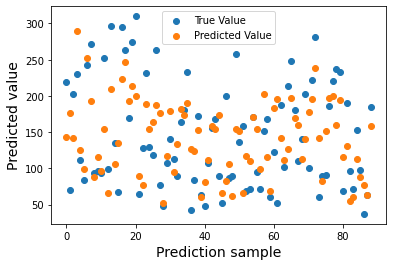

In [93]:
import matplotlib.pyplot as plt
x = np.arange(len(y_test))
plt.scatter(x, y_test,label="True Value")
plt.scatter(x, y_pred,label="Predicted Value")
plt.xlabel('Prediction sample', size=14)
plt.ylabel('Predicted value', size=14)
plt.legend()
# plt.savefig('MLR-200.pdf')
plt.show()

In [94]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,pred)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is 0.4591714169970166
mean_sqrd_error is== 2865.391902685012
root_mean_squared error of is== 53.529355522787796


In [6]:
import numpy as np
a = np.arange(1,400).tolist()
b = np.full(400, 100).tolist() 
c = np.arange(200,600).tolist()
d = np.full(400, 100).tolist() 

In [7]:
print(a,',',b,',',c,',',d)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22